#  1. zápočtová úloha z 01RAD 2022/23

## Popis úlohy

V tomto úkolu je cílem provést předzpracování datového souboru, jeho vizualizaci a jednoduchou lineární regresní úlohu, kde se budeme zajímat o ceny nemovitostí. Za tímto účelem využijeme datový set *saratosa_hoouses* z knihovny *moderndive* obsahující výběr 1057 domů.



## Podmínky a body

Úkol i protokol vypracujte samostatně. Pokud na řešení nějaké úlohy budete přesto s někým spolupracovat, radit se, nezapomeňte to u odpovědi na danou otázku uvést. Tato zápočtová úloha obsahuje 10 otázek po 1 bodu. Celkem za 3 zápočtové úlohy bude možné získat 30 bodů, přičemž pro získání zápočtu je potřeba více jak 20 bodů. Další dodatečné body mohu případně individuálně udělit za řešení mini domácích úkolů z jednotlivých hodin.



## Odevzdání

Protokol ve formátu Rmd+pdf, nebo jako Jupyter notebook (idealně odkaz na gitlab s možností spustit v Colabu) nejpozději do 1. 11. 2022.



### Předzpracování dat:




In [1]:
list_of_packages <- c("tidyverse","car","MASS","GGally","moderndive","ggpubr")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

character(0)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



[[1]]
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "car"       "carData"   "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "MASS"      "car"       "carData"   "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[4]]
 [1] "GGally"    "MASS"      "car"       "carData"   "forcats"   "stringr"  
 [7] "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"  
[13] "tidyverse" "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[19] "methods"   "base"     

[[5]]
 [1] "moderndive" "GGally"     "MASS"       "car"        "carData"   
 [6] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
[11] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[6]]
 [1] "ggpubr"     "moderndive" "GGally"     "MASS"       "car"       
 [6] "carData"    "forcats"    "stringr"    "dplyr"      "purrr"     
[11] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[16] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[21] "methods"    "base"

In [2]:
? saratoga_houses

**Data**

In [3]:
head(saratoga_houses)

price,living_area,bathrooms,bedrooms,fireplaces,lot_size,age,fireplace
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
142212,1982,1.0,3,0,2.00,133,FALSE
134865,1676,1.5,3,1,0.38,14,TRUE
118007,1694,2.0,3,1,0.96,15,TRUE
138297,1800,1.0,2,2,0.48,49,TRUE
129470,2088,1.0,3,1,1.84,29,TRUE
206512,1456,2.0,3,0,0.98,10,FALSE


## Otázka 01

Zjistěte, zdali data neobsahují chybějící hodnoty *NA*. Pokud ano, tak rozhodněte zdali můžete příslušná pozorování z dat odstranit a proč. Které proměnné jsou kvantitativní a které kvalitativní? Jeli možno některé zařadit do obou skupin, pro kterou byste se rozhodli? Které proměnné je možné pužít jako faktorové ordinální a jaké jako faktorové nominální a proč? Spočtěte základní statistiky pro jednotlivé proměnné.

### Řešení 01:

In [4]:
saratoga_houses_s_na <- saratoga_houses[rowSums(is.na(saratoga_houses)) > 0,]
print(saratoga_houses_s_na)

summary(saratoga_houses_s_na)

# A tibble: 9 × 8
   price living_area bathrooms bedrooms fireplaces lot_size   age fireplace
   <dbl>       <dbl>     <dbl>    <dbl>      <dbl>    <dbl> <dbl> <lgl>    
1  50709         960       1.5        2          0       NA    12 FALSE    
2 101997        1214       1.5        2          0       NA    17 FALSE    
3 282373        2793       2.5        3          1       NA    21 TRUE     
4 168065        1016       2          2          0       NA    41 FALSE    
5 247639        1016       2          2          0       NA    41 FALSE    
6  97476        1219       1.5        2          0       NA    19 FALSE    
7  99311        1281       2.5        2          1       NA    18 TRUE     
8 247839        1536       1.5        3          1       NA    66 TRUE     
9 197956        2314       2.5        4          1       NA     1 TRUE     


     price         living_area     bathrooms        bedrooms    
 Min.   : 50709   Min.   : 960   Min.   :1.500   Min.   :2.000  
 1st Qu.: 99311   1st Qu.:1016   1st Qu.:1.500   1st Qu.:2.000  
 Median :168065   Median :1219   Median :2.000   Median :2.000  
 Mean   :165929   Mean   :1483   Mean   :1.944   Mean   :2.444  
 3rd Qu.:247639   3rd Qu.:1536   3rd Qu.:2.500   3rd Qu.:3.000  
 Max.   :282373   Max.   :2793   Max.   :2.500   Max.   :4.000  
                                                                
   fireplaces        lot_size        age        fireplace      
 Min.   :0.0000   Min.   : NA   Min.   : 1.00   Mode :logical  
 1st Qu.:0.0000   1st Qu.: NA   1st Qu.:17.00   FALSE:5        
 Median :0.0000   Median : NA   Median :19.00   TRUE :4        
 Mean   :0.4444   Mean   :NaN   Mean   :26.22                  
 3rd Qu.:1.0000   3rd Qu.: NA   3rd Qu.:41.00                  
 Max.   :1.0000   Max.   : NA   Max.   :66.00                  
                  NA's   :9     

Data chybějící hodnoty obsahují. Konkrétně se jedná o velikosti pozemku a nemusí být zahrnuta z důvodu, že by se mohlo jednat o byty nemající pozemek. Chybějících hodnot je malé množství a lze je tedy odstranit. Jejich ponechání by způsobilo velké nepřesnosti v datové analýze. Kvalitativními proměnnými jsou cena, obytná plocha, plocha pozemku a staří domu. Kvantitativními poté jsou počet koupelen a počet ložnic. Zda-li dům má nebo nemá krb a jestli ano, tak jaké je jejich množství, je proměnná řadící se do obou skupin. Já jsem ji zařadila do kvalitativních proměnných, protože mě zajímá skutečnost, jestli krb je zahrnut či ne a nikoliv jejich počet. Jako faktorové proměnné mohou být použity počet koupelen a počet ložnic, nabývají totiž pouze konečných hodnot.

## Otázka 02

Chceme koupit nemovitost v zahraničí a průzkumem trhu jsme obdřeli předchozí data set *saratoga_houses*. Jelikož ale máme přesnější požadavky a nerozumíme imperiálním jednotkám, potřebujeme data upravit:

* Převeďte cenu nemovitostí z dolarů na koruny v tisících a plochu pozemku a obytnou plochu z akrů a čtverečích stop na $m^2$. (chceck describtion by *? saratoga_houses*) 
* Vyberte jen nemovitosti starší 10 let a mladší 50 let, jejichž cena je menší než 7500000 Kč, a plocha pozemku je mezi 500 a 5000 $m^2$.
* Počet koupelen a počet pokojů převeďte na faktorové proměnné o 3 úrovních.

**Dále pracujte jen s takto omezeným datasetem a s proměnnýma *cena*, *plocha_obytna*, *plocha_pozemku* *pocet_pokoju*,*stari_domu*, *pocet_koupelen*, *krb*.**

### Řešení 02:

In [8]:
domy_prevedene_jednotky <- saratoga_houses
domy_prevedene_jednotky["price"] <- domy_prevedene_jednotky["price"]*0.0247
domy_prevedene_jednotky["lot_size"] <- domy_prevedene_jednotky["lot_size"]*4046.86
domy_prevedene_jednotky["living_area"] <- domy_prevedene_jednotky["living_area"]*0.092903

domy_prevedene_jednotky["bedrooms"] <- factor(domy_prevedene_jednotky$bedrooms)
levels(domy_prevedene_jednotky$bedrooms) = c("1","1","2","3","3")
domy_prevedene_jednotky["bathrooms"] <- factor(domy_prevedene_jednotky$bathrooms)
levels(domy_prevedene_jednotky$bathrooms) = c("1","1","2","2","2","3","3","3")

colnames(domy_prevedene_jednotky) <- c("cena","plocha_obytna", "pocet_koupelen", "pocet_pokoju", "krby", "plocha_pozemku", "stari_domu", "krb")

# Změna na faktorových proměných na proměnné o 3 úrovních
levels(domy_prevedene_jednotky$pocet_pokoju) = c("1","1","2","3","3")
levels(domy_prevedene_jednotky$pocet_koupelen) = c("1","1","2","2","2","3","3","3")

saratoga_houses_bez_na <- domy_prevedene_jednotky[complete.cases(domy_prevedene_jednotky), ]
vybrane_domy <- saratoga_houses_bez_na[saratoga_houses_bez_na$stari_domu > 10 & saratoga_houses_bez_na$stari_domu < 50 & saratoga_houses_bez_na$cena < 7500 & saratoga_houses_bez_na$plocha_pozemku > 500 & saratoga_houses_bez_na$plocha_pozemku < 5000, ]


## Otázka 03 

* Porovnejte průměry cen nemovitostí s krbem a bez krbu a otestujte, zdali na hladině významnosti $\alpha = 0.01$ je průměrná cena nemovitostí s krbem větší než průměrná cena nemovitostí bez krbu.

### Řešení 03:


In [10]:
domy_s_krbem <- vybrane_domy[vybrane_domy$krb == T, ]
domy_bez_krbu <- vybrane_domy[vybrane_domy$krb == F, ]

mean(domy_s_krbem$cena)
mean(domy_bez_krbu$cena)

[1] 4034.714

[1] 2993.701

In [23]:
# Příprava dat
srovnani_ceny_krb <- data.frame(skupina = c(rep("s_krbem", length(domy_s_krbem$cena)), rep("bez_krbu",length(domy_bez_krbu$cena))),
                                cena = c(domy_s_krbem$cena, domy_bez_krbu$cena))

group_by(srovnani_ceny_krb, skupina) %>% summarise(count = n(),
                                                mean = mean(cena, na.rm = TRUE),
                                                sd = sd(cena, na.rm = TRUE))

# Předpoklady t-testu:
# 1) Normalita
# 2) Homogenita roztpylů

# 1)
with(srovnani_ceny_krb, shapiro.test(cena[skupina == "s_krbem"]))
with(srovnani_ceny_krb, shapiro.test(cena[skupina == "bez_krbu"]))

# 2)
vystup_ftest.ftest <- var.test(cena ~ skupina, data = srovnani_ceny_krb)
vystup_ftest.ftest

# t-test
vystup_ttest <- t.test(cena ~ skupina, data = srovnani_ceny_krb, var.equal = TRUE)
vystup_ttest

skupina,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
bez_krbu,195,2993.701,879.4277
s_krbem,268,4034.714,1082.7675



	Shapiro-Wilk normality test

data:  cena[skupina == "s_krbem"]
W = 0.98346, p-value = 0.003395



	Shapiro-Wilk normality test

data:  cena[skupina == "bez_krbu"]
W = 0.94437, p-value = 7.462e-07



	F test to compare two variances

data:  cena by skupina
F = 0.65967, num df = 194, denom df = 267, p-value = 0.002188
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5089426 0.8597752
sample estimates:
ratio of variances 
         0.6596748 



	Two Sample t-test

data:  cena by skupina
t = -11.035, df = 461, p-value < 2.2e-16
alternative hypothesis: true difference in means between group bez_krbu and group s_krbem is not equal to 0
95 percent confidence interval:
 -1226.3943  -855.6315
sample estimates:
mean in group bez_krbu  mean in group s_krbem 
              2993.701               4034.714 


Z testu normality jsme dostali, že data mají normální rozdělení. Následným provedením testu homogenity rozptylů jsme zjistili, že lze provést t-test, protože není výrazný rozdíl mezi rozptyly. Výsledkem t-testu je, že nulovou hypotézu zamítáme.

# Vizualizace dat

## Otázka 04 

* Vykreslete scatterploty pro všechny numerické proměnné, kde bude barevně rozlišeno, zdali se jedná o nemovitost s krbem, nebo bez krbu.
*  Pro proměnné *pocet_pokoju* a *pocet_pater* a *sklep* vykreslete krabicové diagramy (nebo violin ploty), kde odezvou bude *cena*.
* Pro proměnnou *cena* vykreslete histogram spolu s jádrovým odhadem hustoty.


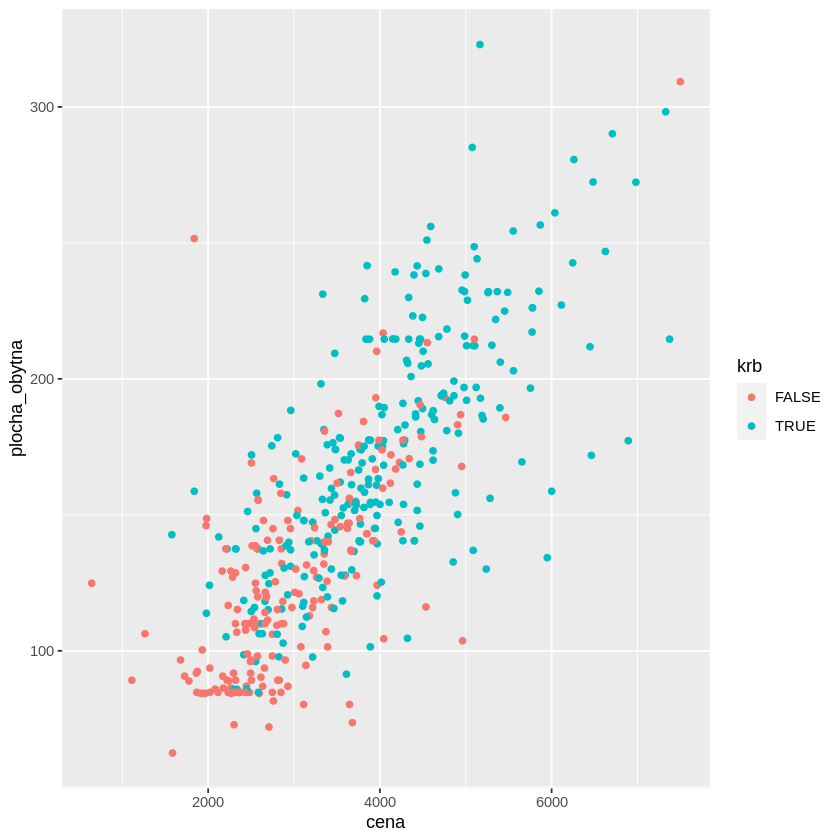

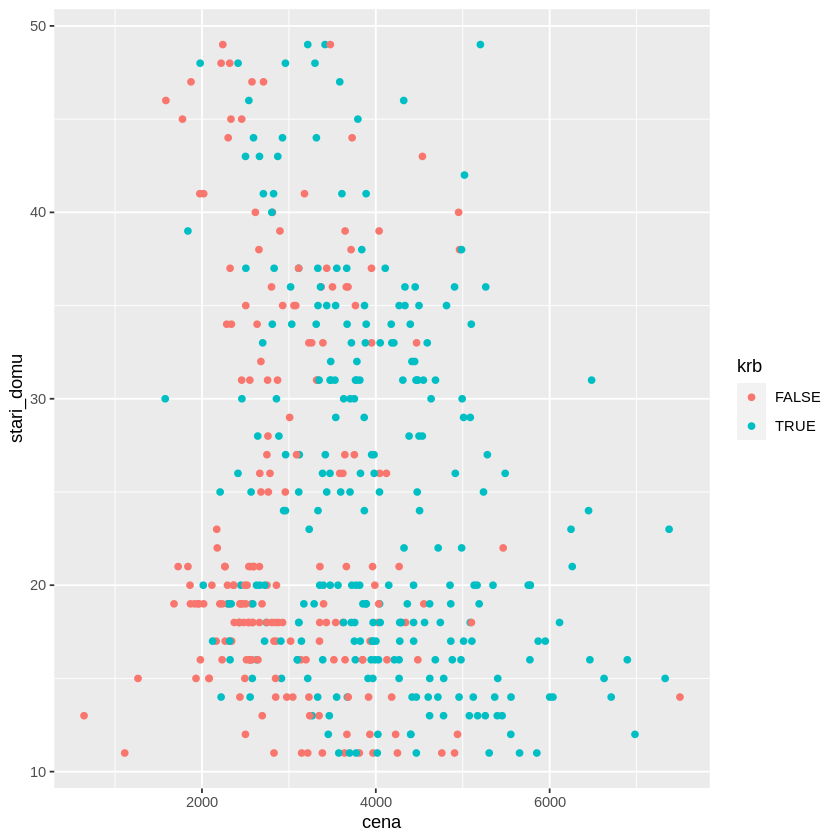

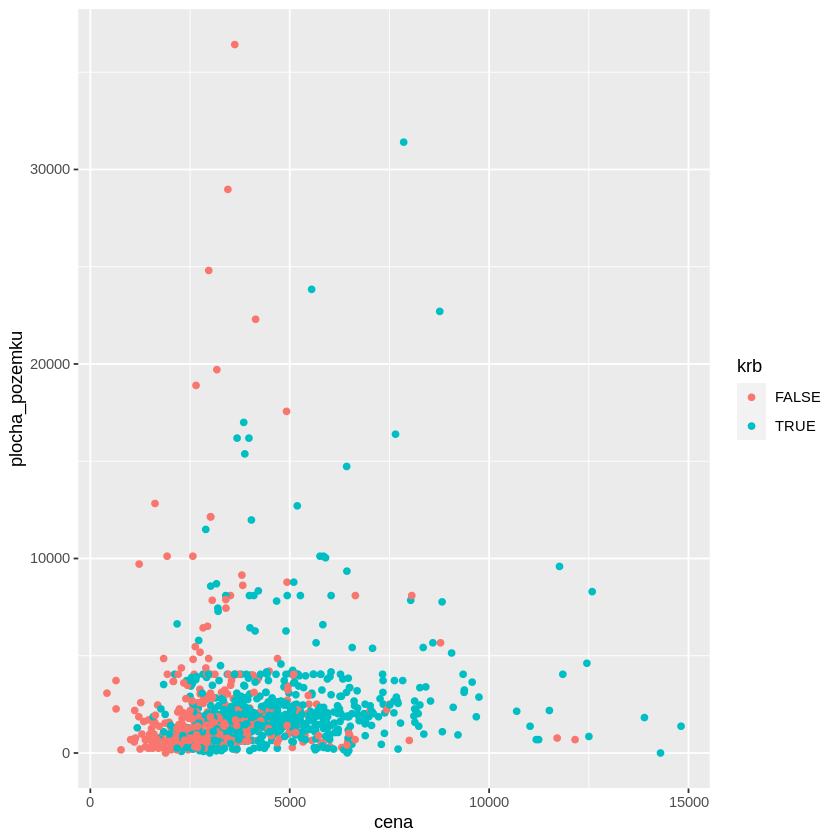

In [25]:
par(mfrow = c(1, 3), bty = "n")
ggplot(vybrane_domy, aes(x=cena, y=plocha_obytna, color = krb), main="Living area")+geom_point()
ggplot(vybrane_domy, aes(x=cena, y=stari_domu, color = krb), main="Age")+geom_point()
ggplot(saratoga_houses_bez_na, aes(x=cena, y=plocha_pozemku, color = krb), main="Age")+geom_point()

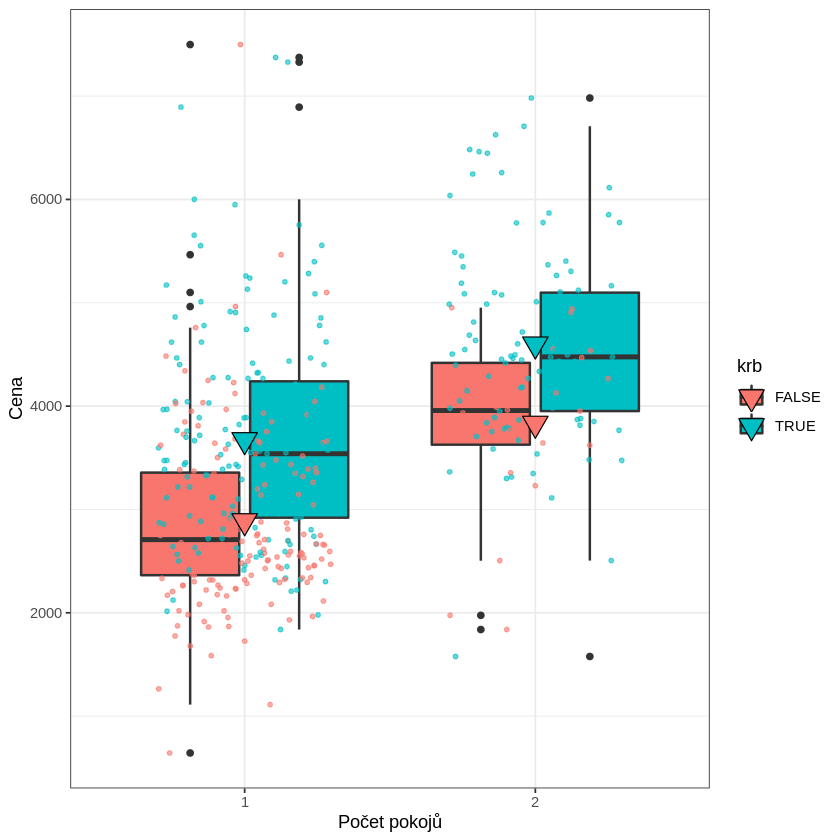

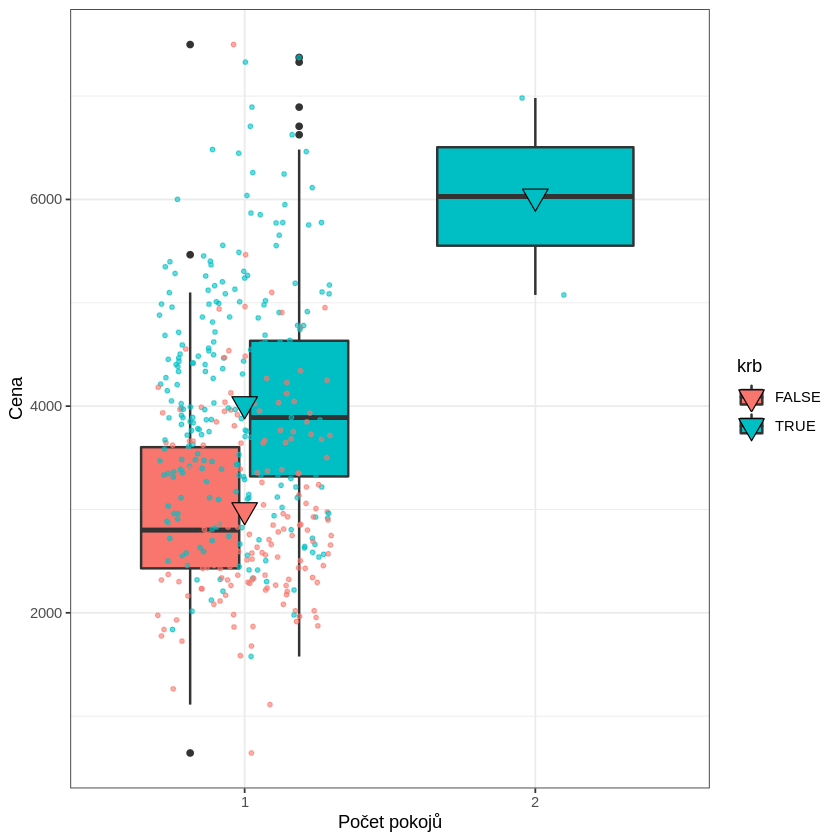

In [28]:
par(mfrow = c(1, 2), bty = "n")
ggplot(vybrane_domy, aes(x=pocet_pokoju, y=cena, fill=krb)) + 
        geom_boxplot(size = 0.7, notch = F) +
        xlab("Počet pokojů") +
        ylab("Cena") +
        theme_bw() +
        geom_jitter(aes(pocet_pokoju,cena,color=krb),
                    position=position_jitter(width=0.3, height=0),
                    alpha = 0.6,
                    size = 1,
                    show.legend=F) +
        stat_summary(fun=mean, geom="point", shape = 25, size=5)

ggplot(vybrane_domy, aes(x=pocet_koupelen, y=cena, fill=krb)) + 
        geom_boxplot(size = 0.7, notch = F) +
        xlab("Počet pokojů") +
        ylab("Cena") +
        theme_bw() +
        geom_jitter(aes(pocet_koupelen,cena,color=krb),
                    position=position_jitter(width=0.3, height=0),
                    alpha = 0.6,
                    size = 1,
                    show.legend=F) +
        stat_summary(fun=mean, geom="point", shape = 25, size=5)

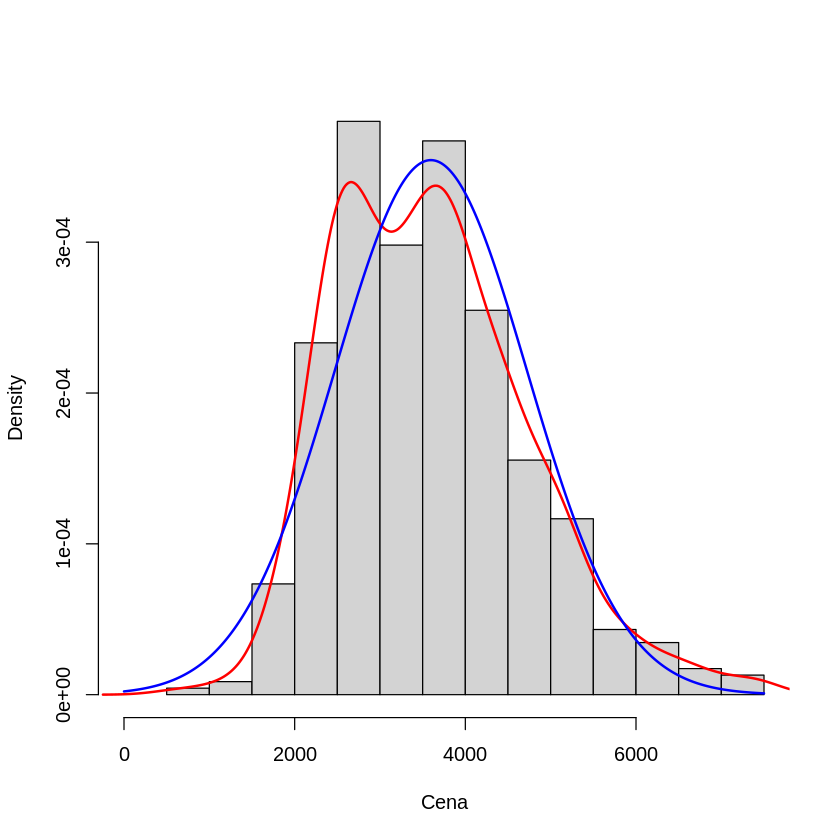

In [32]:
hist(vybrane_domy$cena, freq=F, main="", xlab="Cena", xlim=c(0, 7500))
lines(density(vybrane_domy$cena), col="red", lwd = 2)
x = seq(0, 7500, length = 100000)
y = dnorm(x, mean = mean(vybrane_domy$cena), sd = sd(vybrane_domy$cena))
lines(x, y, col="blue", lwd = 2, lty = 1)

## Otázka 05

Pro kombinace faktorizovaných proměnných *pocet_pokoju*, *pocet_koupelen*  vykreslete cenu nemovitosti, aby bylo na obrázku vidět, jestli se v průměru liší ceny nemovitostí majících více pokojů, nebo více koupelen a zdali jsou zastoupeny všechny kombiance všech úrovních pro dvě zmíněné faktorové proměnné.

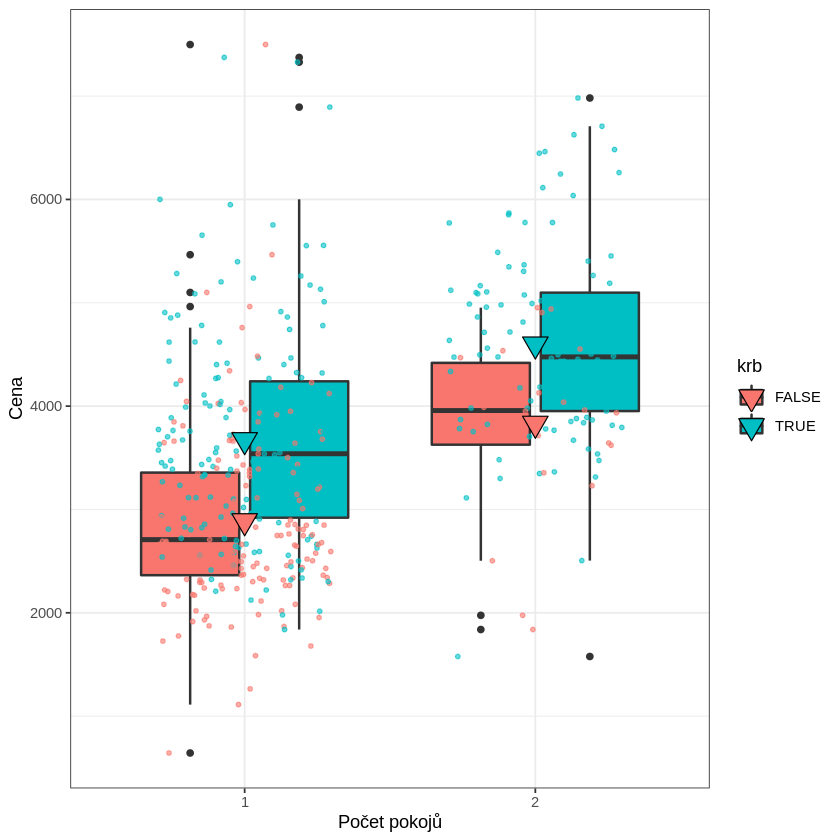

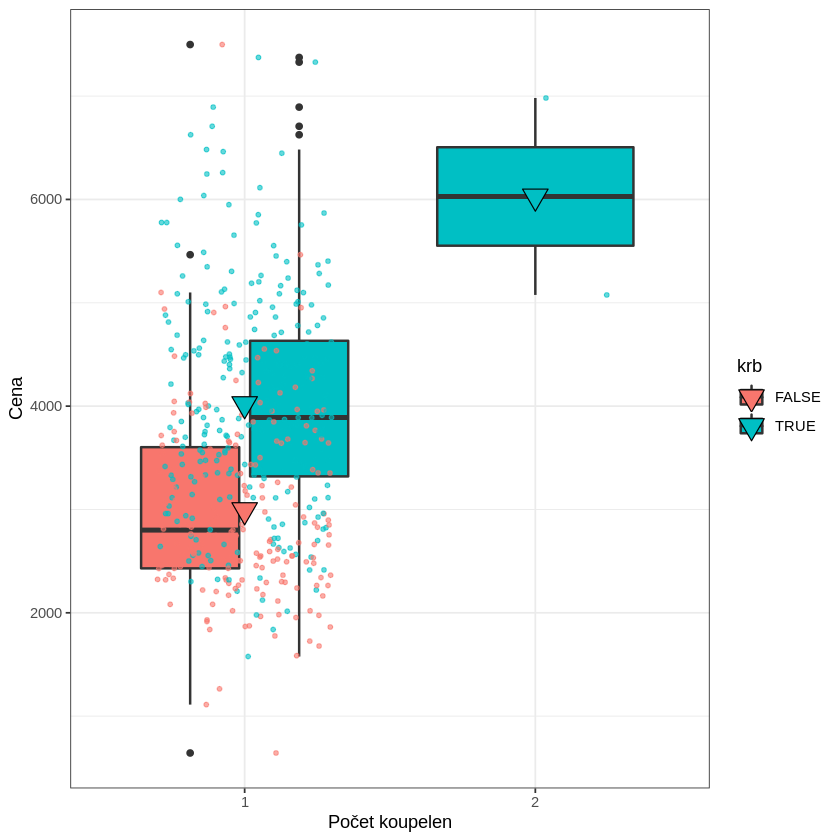

In [34]:
ggplot(vybrane_domy, aes(x=pocet_pokoju, y=cena, fill=krb)) + 
        geom_boxplot(size = 0.7, notch = F) +
        xlab("Počet pokojů") +
        ylab("Cena") +
        theme_bw() +
        geom_jitter(aes(pocet_pokoju,cena,color=krb),
                    position=position_jitter(width=0.3, height=0),
                    alpha = 0.6,
                    size = 1,
                    show.legend=F) +
        stat_summary(fun=mean, geom="point", shape = 25, size=5)

ggplot(vybrane_domy, aes(x=pocet_koupelen, y=cena, fill=krb)) + 
        geom_boxplot(size = 0.7, notch = F) +
        xlab("Počet koupelen") +
        ylab("Cena") +
        theme_bw() +
        geom_jitter(aes(pocet_koupelen,cena,color=krb),
                    position=position_jitter(width=0.3, height=0),
                    alpha = 0.6,
                    size = 1,
                    show.legend=F) +
        stat_summary(fun=mean, geom="point", shape = 25, size=5)


## Otázka 06

Pro nemovitosti s dvěma ložnicema vykreslete závislost ceny na obytné ploše nemovitosti, kde jednotlivé události označíte barvou podle toho zdali mají krb a velikost bodů v grafu bude odpovídat počtu koupelen (pro tuto úlohu je lepší vzít počet koupelen jako numerickou proměnnou).

**Dále pracujte jen s nemovitostmi se dvěma ložnicemi.**

Warning message:
“Using size for a discrete variable is not advised.”


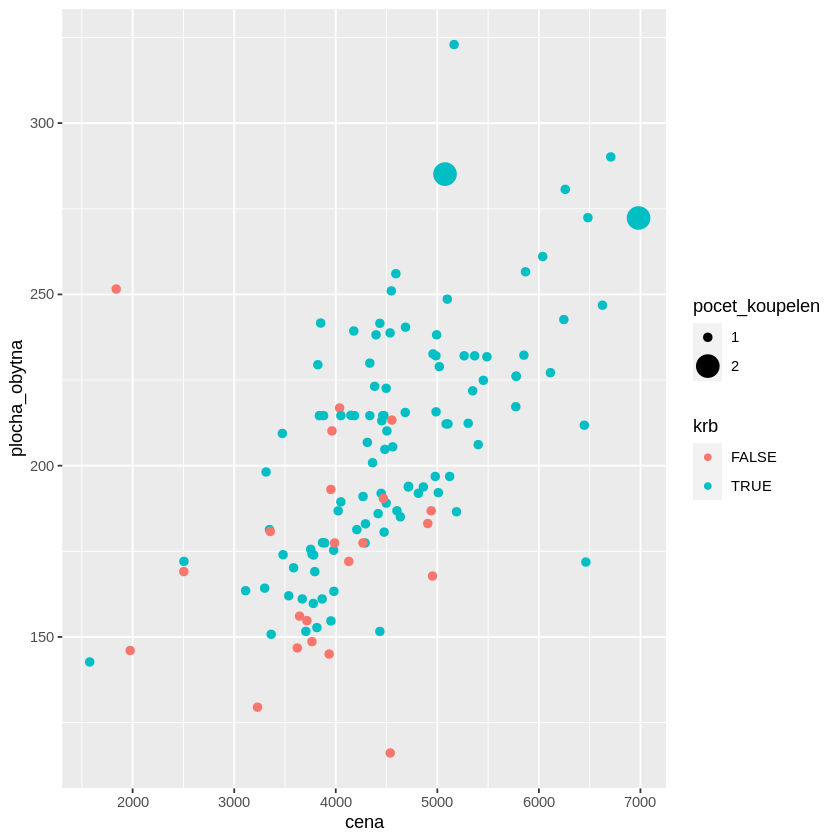

In [35]:
domy_s_dvemi_loznicemi <- vybrane_domy[vybrane_domy$pocet_pokoju == 2, ]

ggplot(domy_s_dvemi_loznicemi, aes(x=cena, y=plocha_obytna, color = krb), main="Obytná plocha pro domy s dvěmi ložnicemi") + geom_point(aes(size=pocet_koupelen))

# Jednoduchý lineární model

## Otázka 07

Sestavte jednoduchý regresní model (s i bez interceptu), kde vysvětlovaná proměnná
bude cena nemovitosti a vysvětlující obytná plocha.   Spočtěte pro oba modely $R^2$ a $F$ statistiky, co nám o modelech říkají. Vyberte jeden z nich a zdůvodněte proč ho preferujete.

Na základě zvoleného modelu odpovězte, zdali cena nemovitosti závisí na obytné ploše  a pokud ano, o kolik se změní očekávaná cena pro nemovitost s obytnou plochou zvětšenou o $20 m^2$? 

In [37]:
# Model bez interceptu:
model_bez_interceptu = lm(cena ~ -1 + plocha_obytna, vybrane_domy)
summary(model_bez_interceptu)

price_change0 = model_bez_interceptu$coefficients * 20

# Model s interceptem:
model_s_interceptem = lm(cena ~ plocha_obytna, vybrane_domy)
summary(model_s_interceptem)

price_change1 = model_s_interceptem$coefficients[2] * 20


Call:
lm(formula = cena ~ -1 + plocha_obytna, data = vybrane_domy)

Residuals:
    Min      1Q  Median      3Q     Max 
-3976.9  -304.9   118.5   474.9  2846.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
plocha_obytna  23.1144     0.2207   104.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 758.2 on 462 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9595 
F-statistic: 1.097e+04 on 1 and 462 DF,  p-value: < 2.2e-16



Call:
lm(formula = cena ~ plocha_obytna, data = vybrane_domy)

Residuals:
    Min      1Q  Median      3Q     Max 
-3568.8  -386.9   -16.1   373.1  2844.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   808.7660   112.9141   7.163 3.15e-12 ***
plocha_obytna  18.2772     0.7071  25.848  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 720 on 461 degrees of freedom
Multiple R-squared:  0.5917,	Adjusted R-squared:  0.5908 
F-statistic: 668.1 on 1 and 461 DF,  p-value: < 2.2e-16


**Závěr:** Pro model bez interceptu vyšla vyšší $R^2$ statistika, ale lze očekávát, že cena bude záviset i na rozloze pozemku, který do modelu jako proměnná nevstupuje. Tedy i s nulovou obytnou plochou stále platíme za pozemek a tedy by cena pro nulovou obytnou plochu neměla být nulová.

Cena určitě záleží na obytné ploše, protože z $t$-testu vychází, že zamítáme hypotézu, že vysvětlující a vysvětlovaná proměnná nemají žádný vztah. Tedy ena nemovistosti je určitě závislá na obytné ploše, což je se shodou s nějakou intuitivní představou.

## Otázka 08
Sestavte jednoduchý linární model jako v předchozí otázce pro nemovitosti s krbem a bez krbu. Jaký model vykazuje silnější linearní vztah mezi cenou a obytnou plochou? O kolik cena s rostoucí obytnou plochou pro nemovitosti s krbem roste rychleji než pro nemovitosti bez krbu?

Spočtěte 95% konfidenční intervaly pro regresní koeficienty popisující sklon regresní přímky v obou modelech a zjistěte, zdali se protínají. Co z toho můžeme vyvozovat?

Na základě těchto modelů zjistěte o kolik procent bude mít průměrná nemovitost s krbem a obytnou plochou $160m^2$ vyšší očekávanou cenu než průměrná nemovitost o stejné obytné ploše, ale bez krbu.

In [41]:
# Model bez interceptu
model_bez_interceptu_s_krbem = lm(cena ~ -1 + plocha_obytna, domy_s_krbem)
summary(model_bez_interceptu_s_krbem)

model_bez_interceptu_bez_krbu = lm(cena ~ -1 + plocha_obytna, domy_bez_krbu)
summary(model_bez_interceptu_bez_krbu)


# Model s interceptem
model_s_interceptem_s_krbem = lm(cena ~ plocha_obytna, domy_s_krbem)
summary(model_s_interceptem_s_krbem)

model_s_interceptem_bez_krbu = lm(cena ~ plocha_obytna, domy_bez_krbu)
summary(model_s_interceptem_bez_krbu)

cat("Rozdíl růstu ceny pro model bez interceptu: ", model_bez_interceptu_s_krbem$coefficients - model_bez_interceptu_bez_krbu$coefficients,"\n")
cat("Rozdíl růstu ceny pro model s interceptem: ", model_s_interceptem_s_krbem$coefficients[2] - model_s_interceptem_bez_krbu$coefficients[2],"\n")


Call:
lm(formula = cena ~ -1 + plocha_obytna, data = domy_s_krbem)

Residuals:
     Min       1Q   Median       3Q      Max 
-2283.33  -341.35    98.18   496.39  2852.71 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
plocha_obytna  23.0657     0.2752   83.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 800.7 on 267 degrees of freedom
Multiple R-squared:  0.9634,	Adjusted R-squared:  0.9633 
F-statistic:  7026 on 1 and 267 DF,  p-value: < 2.2e-16



Call:
lm(formula = cena ~ -1 + plocha_obytna, data = domy_bez_krbu)

Residuals:
    Min      1Q  Median      3Q     Max 
-4008.0  -226.1   130.3   427.5  2553.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
plocha_obytna  23.2379     0.3816    60.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 697.3 on 194 degrees of freedom
Multiple R-squared:  0.9503,	Adjusted R-squared:   0.95 
F-statistic:  3709 on 1 and 194 DF,  p-value: < 2.2e-16



Call:
lm(formula = cena ~ plocha_obytna, data = domy_s_krbem)

Residuals:
     Min       1Q   Median       3Q      Max 
-1961.55  -424.67   -71.22   373.19  2769.53 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1032.405    186.437   5.538 7.36e-08 ***
plocha_obytna   17.440      1.049  16.627  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 759.6 on 266 degrees of freedom
Multiple R-squared:  0.5096,	Adjusted R-squared:  0.5078 
F-statistic: 276.5 on 1 and 266 DF,  p-value: < 2.2e-16



Call:
lm(formula = cena ~ plocha_obytna, data = domy_bez_krbu)

Residuals:
    Min      1Q  Median      3Q     Max 
-3197.6  -353.3     5.5   379.6  2323.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    960.217    163.005   5.891 1.68e-08 ***
plocha_obytna   16.200      1.246  13.006  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 643.7 on 193 degrees of freedom
Multiple R-squared:  0.4671,	Adjusted R-squared:  0.4643 
F-statistic: 169.2 on 1 and 193 DF,  p-value: < 2.2e-16


Rozdíl růstu ceny pro model bez interceptu:  -0.172147 
Rozdíl růstu ceny pro model s interceptem:  1.2402 


In [42]:
print("Model without intercept with fireplace")
confint(model_bez_interceptu_s_krbem, level = 0.95)
print("Model without intercept without fireplace")
confint(model_bez_interceptu_bez_krbu, level = 0.95)
print("Model with intercept with fireplace")
confint(model_s_interceptem_s_krbem, level = 0.95)
print("Model with intercept without fireplace")
confint(model_s_interceptem_bez_krbu, level = 0.95)

[1] "Model without intercept with fireplace"


,2.5 %,97.5 %
plocha_obytna,22.52394,23.60756


[1] "Model without intercept without fireplace"


,2.5 %,97.5 %
plocha_obytna,22.4853,23.99049


[1] "Model with intercept with fireplace"


,2.5 %,97.5 %
(Intercept),665.32498,1399.48407
plocha_obytna,15.37489,19.50535


[1] "Model with intercept without fireplace"


,2.5 %,97.5 %
(Intercept),638.7177,1281.71658
plocha_obytna,13.7432,18.65664


In [48]:
# Predict price for house with living area 160 m^2
nova_predikce<-data.frame(plocha_obytna=160)
pred_bez_interceptu_s_krbem <- predict(model_bez_interceptu_s_krbem,nova_predikce)
pred_bez_interceptu_bez_krbu <- predict(model_bez_interceptu_bez_krbu,nova_predikce)
pred_s_interceptem_s_krbem <- predict(model_s_interceptem_s_krbem,nova_predikce)
pred_s_interceptem_bez_krbu <- predict(model_s_interceptem_bez_krbu,nova_predikce)

cat("Model without intercept with fireplace: ", pred_bez_interceptu_s_krbem,"\n")
cat("Model without intercept without fireplace: ", pred_bez_interceptu_bez_krbu,"\n")
cat("Model with intercept with fireplace: ", pred_s_interceptem_s_krbem,"\n")
cat("Model with intercept without fireplace: ", pred_s_interceptem_bez_krbu,"\n")

cat("Zvýšení ceny nemovitosti pro model bez interceptu je o ", (pred_bez_interceptu_s_krbem/pred_bez_interceptu_bez_krbu-1)*100,"% \n")
cat("Zvýšení ceny nemovitosti pro model s interceptem je o ", (pred_s_interceptem_s_krbem/pred_s_interceptem_bez_krbu-1)*100,"% \n")


Model without intercept with fireplace:  3690.52 
Model without intercept without fireplace:  3718.063 
Model with intercept with fireplace:  3822.824 
Model with intercept without fireplace:  3552.204 
Zvýšení ceny nemovitosti pro model bez interceptu je o  -0.740803 % 
Zvýšení ceny nemovitosti pro model s interceptem je o  7.618352 % 


**Závěr:** 

## Otázka 9

Vykreslete scatterplot obytné plochy a ceny nemovitostí. Do tohoto grafu vykreslete regresní přímky vybraných modelů pro nemovitosti s krbem a bez něho, jednoltivé body i regresní přímky označte barvou podle toho k jaké skupině přísluší.

Sestrojte 90% konfidenční intervaly okolo očekávaných cen pro jednoltivé skupiny a na jejich základě rozhodněte, zdali a jak se očekávané ceny budou lišit pro nemovitosti s obytnou plochou menší než $120m^2$. Je to porovnávání správné? Zdůvoněte.

[1] 4034.714

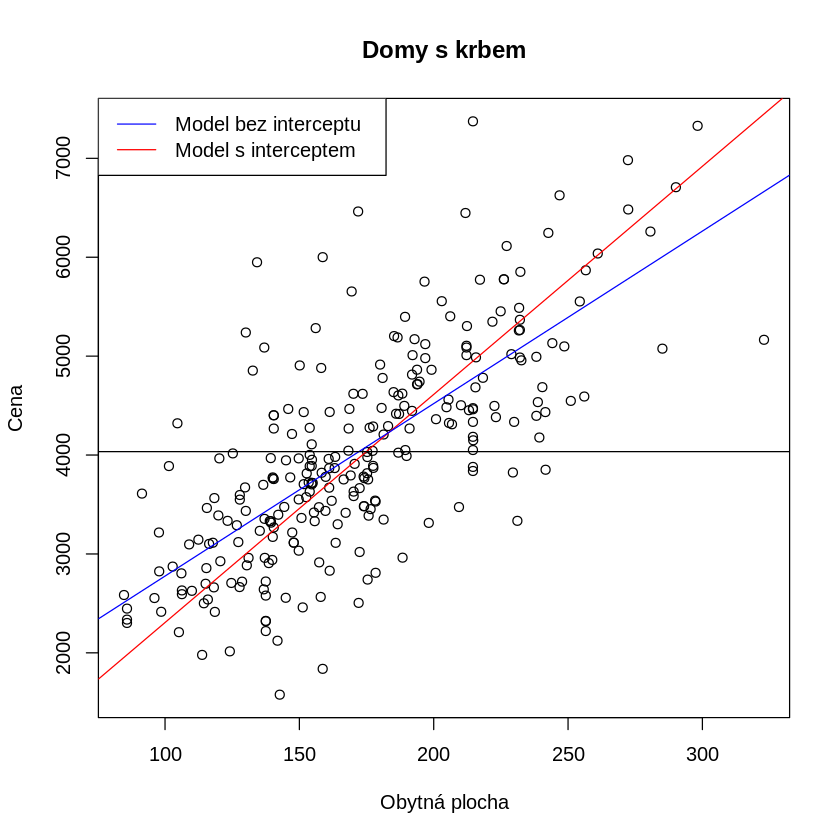

[1] 2993.701

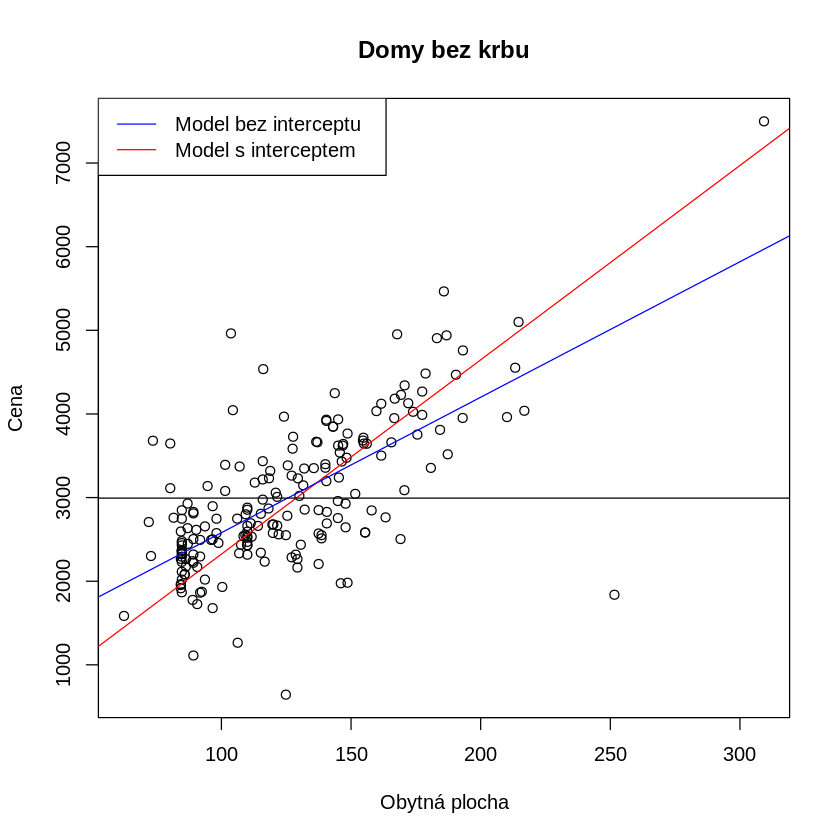

In [49]:
plot(cena ~ plocha_obytna, vybrane_domy[vybrane_domy$krb == T, ],
     main="Domy s krbem", xlab="Obytná plocha", ylab="Cena")
abline(model_bez_interceptu_s_krbem, col ="red")
abline(model_s_interceptem_s_krbem, col ="blue")
abline(a=mean(vybrane_domy[vybrane_domy$krb == T, ]$cena), b=0)
(mean(vybrane_domy[vybrane_domy$krb == T, ]$cena))
legend("topleft",legend = c("Model bez interceptu","Model s interceptem"),lty = c(1,1),col = c("blue","red"))

plot(cena ~ plocha_obytna, vybrane_domy[vybrane_domy$krb == F, ],
     main="Domy bez krbu", xlab="Obytná plocha", ylab="Cena")
abline(model_bez_interceptu_bez_krbu, col ="red")
abline(model_s_interceptem_bez_krbu,col ="blue")
abline(a=mean(vybrane_domy[vybrane_domy$krb == F, ]$cena), b=0)
(mean(vybrane_domy[vybrane_domy$krb == F, ]$cena))
legend("topleft",legend = c("Model bez interceptu","Model s interceptem"),lty = c(1,1),col = c("blue","red"))

## Otázka 10

Vykreslete histogramy pro rezidua modelů z předchozí otázky. Proložte je hustotou normálního rozdělení s nulovou střední hodnotou a rozptylem odpovídajícím $\hat{\sigma}^2$ z jednotlivých modelů.

Co výsledný graf říka o n našich modelech a je toto ověření dostatečné pro validaci model?

Navrněte další úpravy modelu za cílem co nejlépe predikvoat cenu nemovitosti.

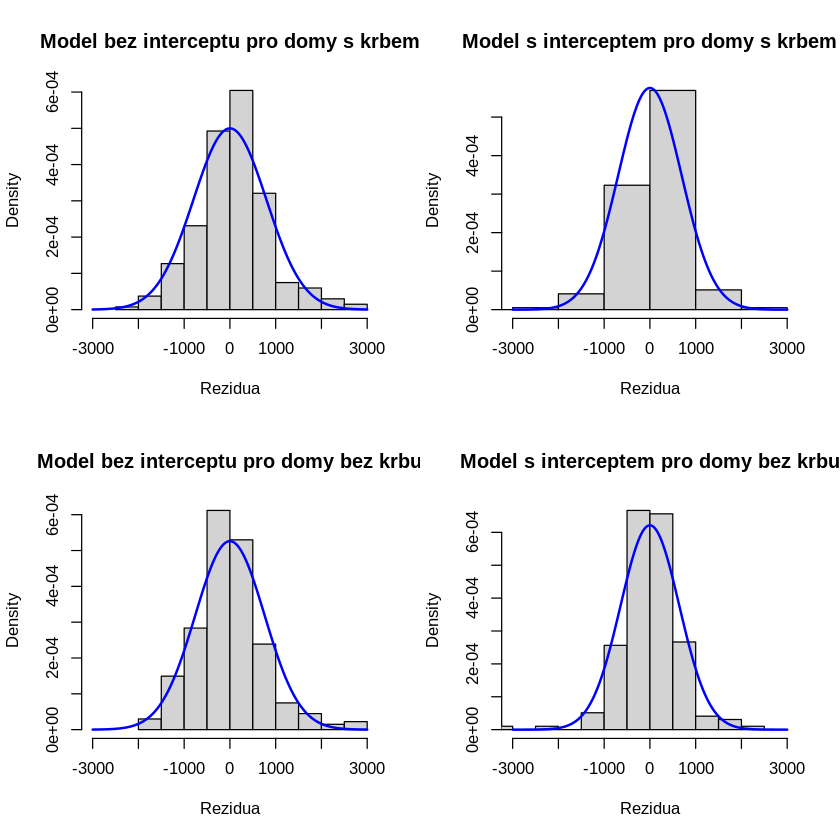

In [52]:
par(mfrow = c(2, 2), bty = "n")
hist(residuals(model_bez_interceptu_s_krbem), freq=F, main="Model bez interceptu pro domy s krbem", xlab="Rezidua", xlim=c(-3000, 3000))
x01 = seq(-3000, 3000, length = 100000)
y01 = dnorm(x01, mean = 0, sd = sd(residuals(model_bez_interceptu_s_krbem)))
lines(x01, y01, col="blue", lwd = 2, lty = 1)

hist(residuals(model_bez_interceptu_bez_krbu), freq=F, main="Model s interceptem pro domy s krbem", xlab="Rezidua", xlim=c(-3000, 3000))
x11 = seq(-3000, 3000, length = 100000)
y11 = dnorm(x11, mean = 0, sd = sd(residuals(model_bez_interceptu_bez_krbu)))
lines(x11, y11, col="blue", lwd = 2, lty = 1)

hist(residuals(model_s_interceptem_s_krbem), freq=F, main="Model bez interceptu pro domy bez krbu", xlab="Rezidua", xlim=c(-3000, 3000))
x00 = seq(-3000, 3000, length = 100000)
y00 = dnorm(x00, mean = 0, sd = sd(residuals(model_s_interceptem_s_krbem)))
lines(x00, y00, col="blue", lwd = 2, lty = 1)

hist(residuals(model_s_interceptem_bez_krbu), freq=F, main="Model s interceptem pro domy bez krbu", xlab="Rezidua", xlim=c(-3000, 3000))
x10 = seq(-3000, 3000, length = 100000)
y10 = dnorm(x10, mean = 0, sd = sd(residuals(model_s_interceptem_bez_krbu)))
lines(x10, y10, col="blue", lwd = 2, lty = 1)


**Návrh na úpravy modelu:** 
Model by bylo možné vylepšit přidáním dalších vysvětlujících proměnných. Cena domu bude určitě záviset i na jeho staří a velikosti pozemku. Další proměnnou závislou na ceně domu by mohla být např. jeho lokalita, počet místností. 


Především by mohlo model vylepšit přidání dalších vysvětlujících proměnných. Cena domu bude určitě silně závislá i na velikosti pozemku a stáří domu. Jeden z dalších důležitých ukazatelů určující cenu domu je i jeho lokace, ale tato informace v datech chybí.